### Import Libraries

In [1]:
import wdn_viz_003 as wdn
import matplotlib.pyplot as plt

### Run an EPS simulation and stores necessary information about network and the simulation in a dataframe

In [2]:
# Initialize model
model = wdn.initialize_model('Networks\CTown.inp')

# Define file path for images
model['image_path'] = r'C:\Users\mst2245\Box Sync\Research\7. Network Plotting\Demo Folder'

# <span style="color:red"> 1. BASIC plots </span> display a barebones version of the network topology similarly to EPANET
 

## 1.1 Create a BASIC plot

### The markers/line styles in this plot are the current default styles we have chosen for each element. Pipes are black edges, pumps are blue edges, and valves are represented by orange '+' markers shown at the center point of the valve edge.

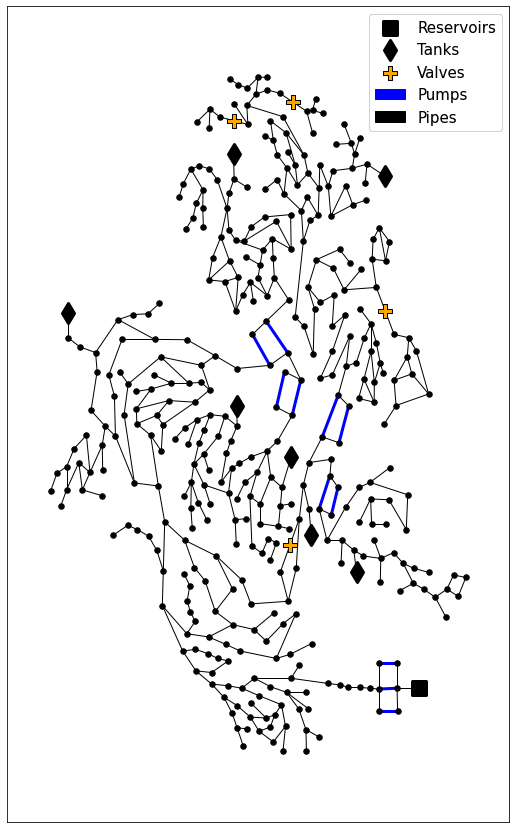

In [3]:
# Defines a matplotlib figure and axis. The user can customize the size of the plot in this way
fig, ax = plt.subplots(figsize = (9,15))

# Creates plot of network with basic elements
wdn.plot_basic_elements(model,ax)

## 1.2 Create a BASIC plot: only links, no nodes, no legend

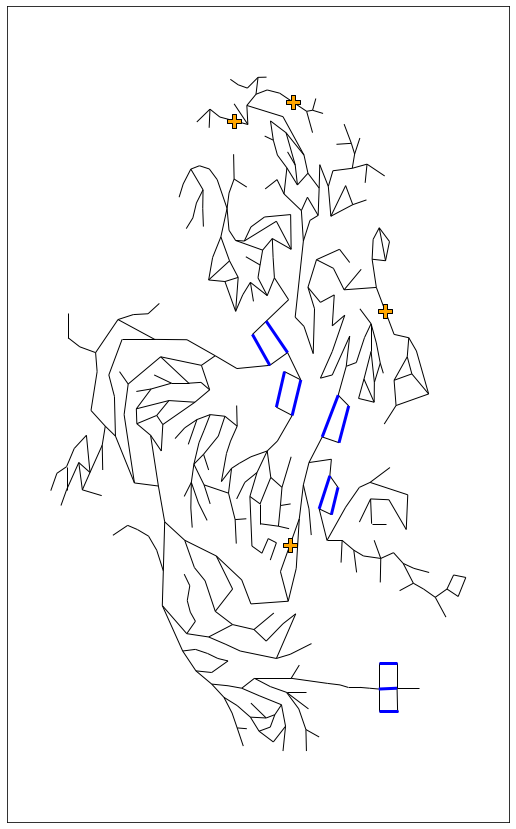

In [4]:
fig, ax = plt.subplots(figsize=(9,15))

# Plots links only without legend
wdn.plot_basic_elements(model, ax, nodes=False, links=True, reservoirs=False, tanks=False, pumps=True, legend=False)

## 1.3 Create a BASIC plot: saving options

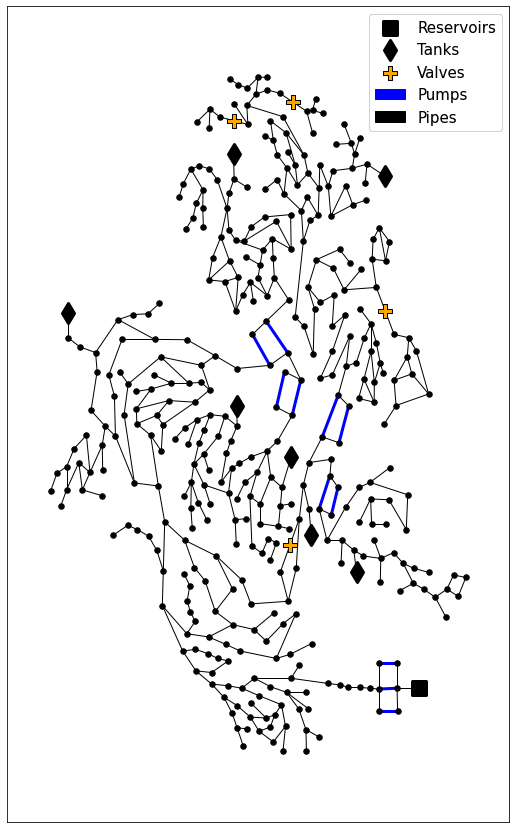

In [5]:
fig, ax = plt.subplots(figsize=(9,15))

#Plots basic elements but does not save the image. The save name can also be changed with save_name function input.
wdn.plot_basic_elements(model, ax, savefig=False, save_name='Basic')

# <span style="color:red"> 2. DISCRETE NODES plots </span> discretize node data that can be described as continuous (that can be represented using a colormap), sort this data into bins (thus converting the colormap into a legend with distinct colors), and then plot the discretized node data.

## 2.1 Create a plot for DISCRETE NODES: ELEVATION


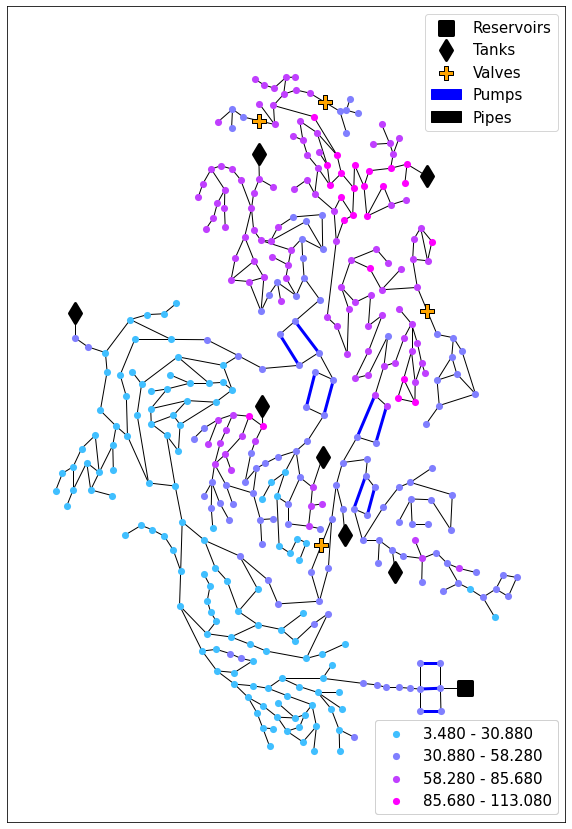

In [6]:
fig, ax = plt.subplots(figsize=(10,15))

# Plots network parameter that does not change with time. "bin_edge_num" = the number of bin edges; i.e. the number of bins + 1. 
# Default "bin_edge_num" value is 5 (4 bins).
# "parameter" is the node characteristic we are examining
wdn.plot_discrete_nodes(model, ax, bin_edge_num = 5, parameter='elevation', legend=True, cmap = 'cool')

## 2.2 Create a plot for DISCRETE NODES: PRESSURE AT TIME STEP 12

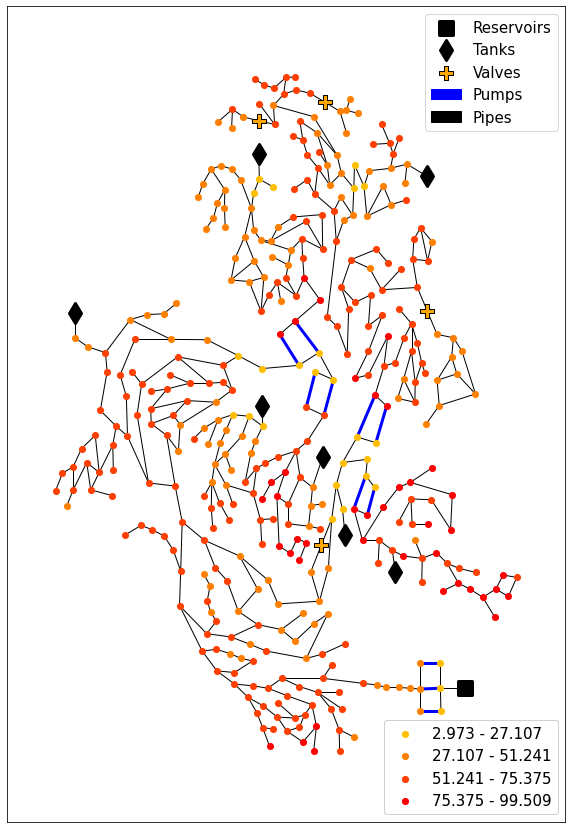

In [7]:
fig, ax = plt.subplots(figsize=(10,15))

#Plots network parameter that changes with time (pressure, demand, etc.) at timestep 12
wdn.plot_discrete_nodes(model, ax, 5, parameter='pressure', value=12)

## 2.3 Create a plot for DISCRETE NODES: MAX PRESSURE 

C:\Software\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


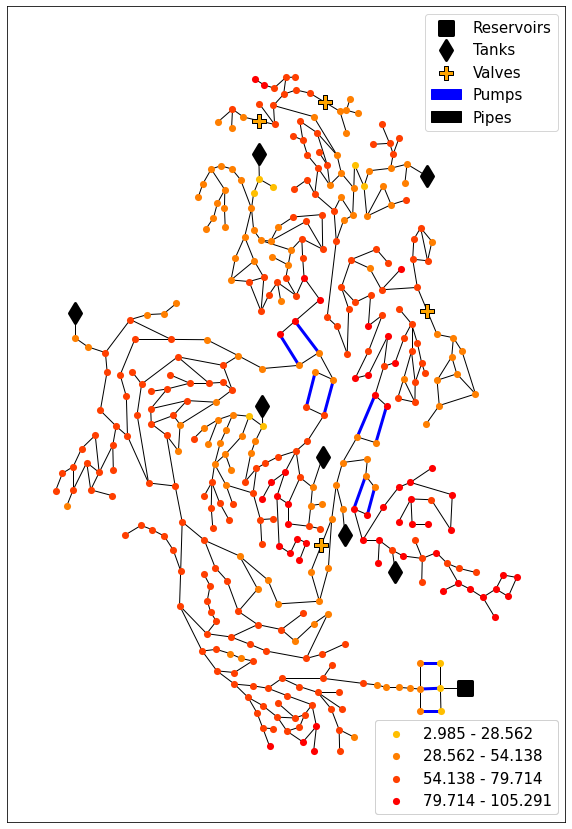

In [8]:
fig, ax = plt.subplots(figsize=(10, 15))

#Plots network max pressure. Can also plot min, mean, or median pressure/other parameters.
wdn.plot_discrete_nodes(model, ax, 5, parameter='pressure', value='max')

## 2.4 Create a plot for DISCRETE NODES with CUSTOM BINS

C:\Software\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


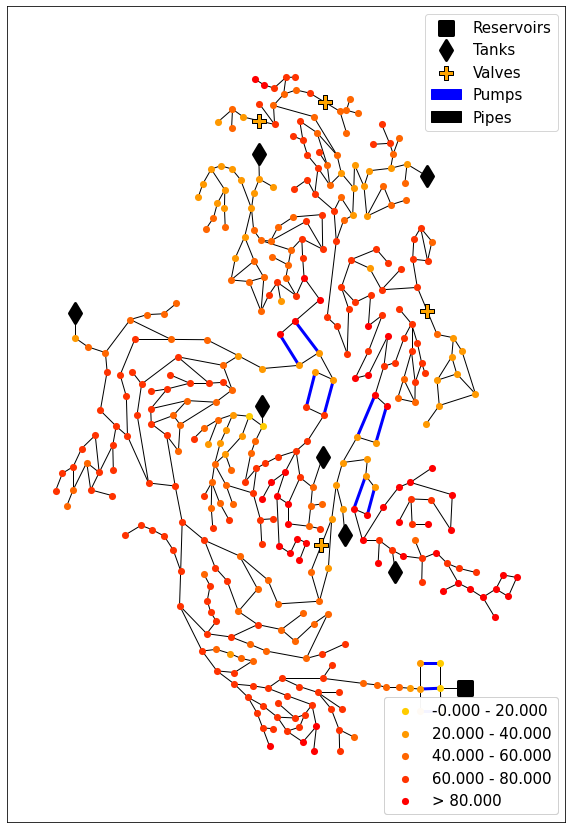

In [9]:
fig, ax = plt.subplots(figsize=(10, 15))

#Plots network max pressure with custom bins
# If bins and bin_edge_num are both provided, bins will be prioritized 
wdn.plot_discrete_nodes(model, ax, 3, bins=[-0.0001,20,40,60,80], parameter='pressure', value='max')

## 2.5 Create a plot for DISCRETE NODES: all customization options

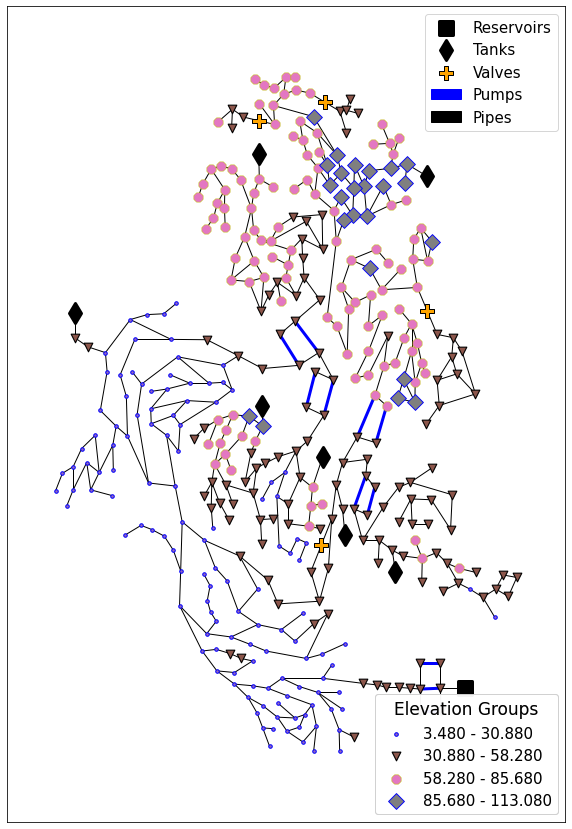

In [10]:
fig, ax = plt.subplots(figsize=(10,15))

#Plots network elevation with all customization options used
wdn.plot_discrete_nodes(model, ax, 5, 
                        parameter='elevation',
                        bin_size_list = [50,75,100,125,150], 
                        bin_shape_list = ['.','v','8','D','1'], 
                        bin_border_list = ['b','k','y','b','k'],
                        bin_border_width_list = [1,1.1,0.5,0.9,1],
                        cmap = None,
                        color_list = ['#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22'],
                        savefig = True, 
                        legend_title = 'Elevation Groups', 
                        save_name = 'ElevationMap2')

# <span style="color:red"> 3. CONTINUOUS NODES plots </span> display node data that can be described as continuous (that can be represented using a colormap).

## 3.1 Create a plot for CONTINUOUS NODES: ELEVATION

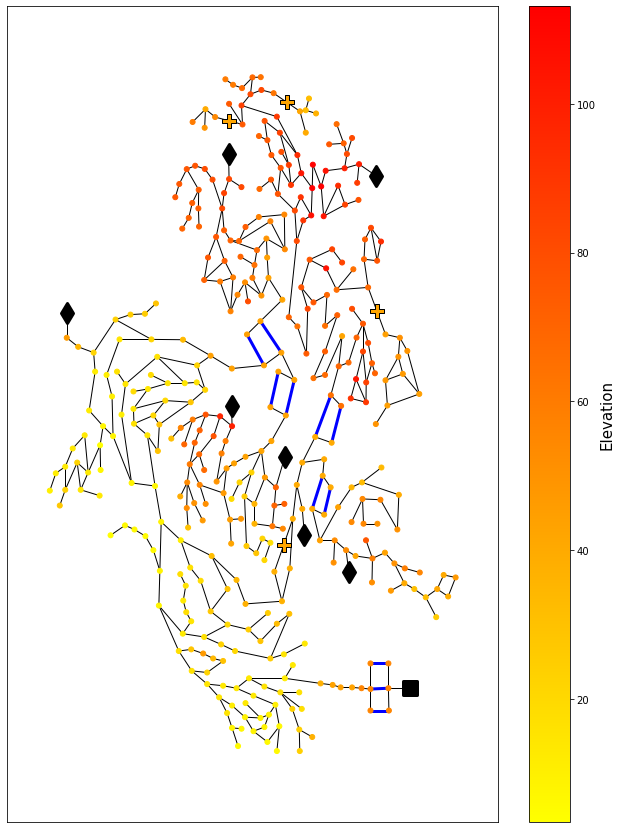

In [11]:
fig, ax = plt.subplots(figsize=(11,15))

#Plots network elevation continuously with color bar.
wdn.plot_continuous_nodes(model, ax, parameter='elevation', color_bar_title="Elevation", save_name="ContinuousElevation")

## 3.2 Create a plot for CONTINUOUS NODES: MEAN DEMAND (custom options)

C:\Software\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


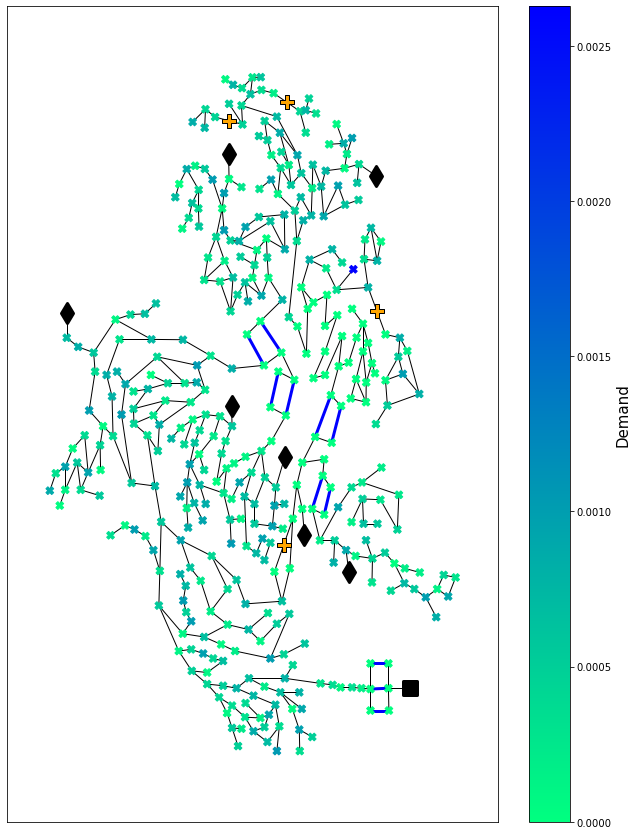

In [12]:
fig, ax = plt.subplots(figsize=(11,15))

#Plots mean network demand with reversed winter color map and node shape 'X' with node size 60
wdn.plot_continuous_nodes(model, ax, parameter='demand',value='mean',
                          cmap='winter_r',
                          node_shape='X',
                          node_size=60,
                          color_bar_title="Demand", 
                          save_name="ContinuousDemand")

## 3.3 Create a plot for CONTINUOUS NODES: MEAN DEMAND (custom options)

C:\Software\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


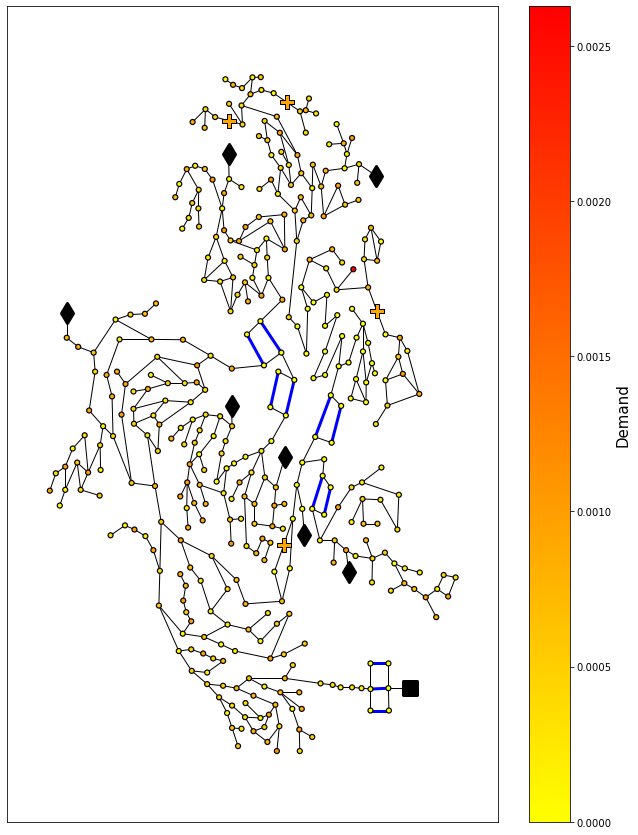

In [13]:
fig, ax = plt.subplots(figsize=(11,15))

#Plots mean network demand with size 100, and black borders with width 1.2
wdn.plot_continuous_nodes(model,ax,parameter='demand',value='mean',
                          node_size=100,
                          edge_colors='k',
                          line_widths=1.2,
                          color_bar_title="Demand", 
                          save_name="ContinuousDemand")

# <span style="color:red"> 4. DISCRETE LINKS plots </span> discretize link data that can be described as continuous (that can be represented using a colormap), sort this data into bins (thus converting the colormap into a legend with distinct colors), and then plot the discretized link data.

## 4.1 Create a plot for DISCRETE LINKS: MEAN FLOW RATE

C:\Software\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


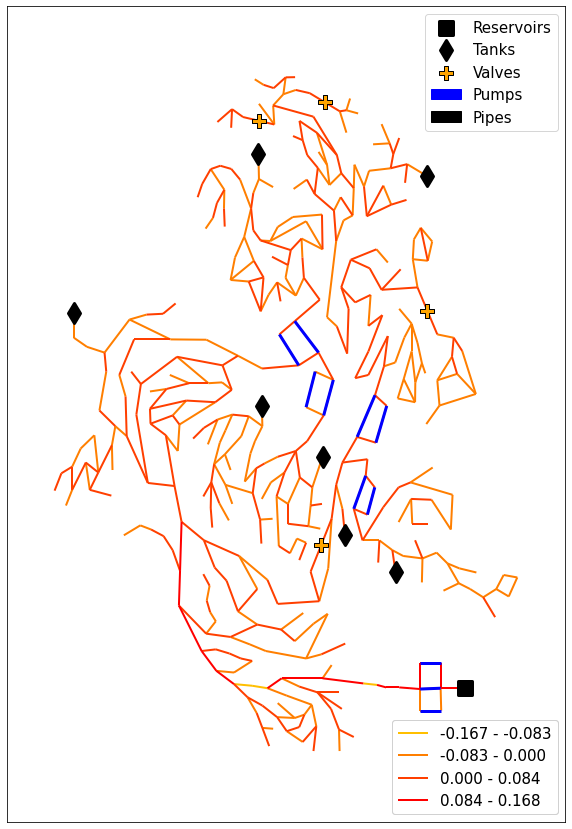

In [14]:
fig, ax = plt.subplots(figsize=(10,15))

#Plots mean flowrate with 5 bin edges.
wdn.plot_discrete_links(model, ax, 5, parameter='flowrate', value='mean', pumps=True)

## 4.2 Create a plot for DISCRETE LINKS: MEAN FLOW RATE (custom options)

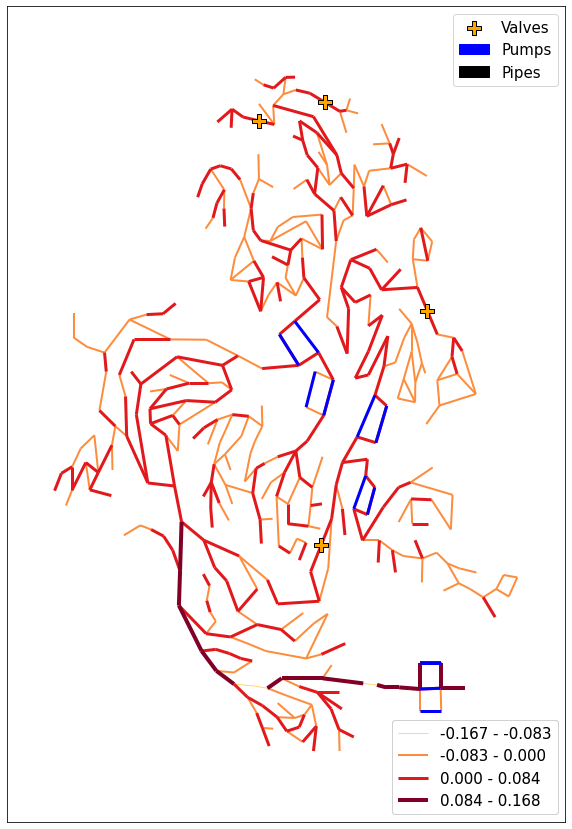

In [15]:
fig, ax = plt.subplots(figsize=(10,15))

#Plots mean flowrate with 5 bin edges with custom link widths, no reservoirs or tanks and custom cmap
wdn.plot_discrete_links(model, ax, 5, parameter='flowrate', value='mean',
                        bin_width_list=[1,2,3,4], 
                        reservoirs=False,
                        tanks=False,
                        cmap='YlOrRd')

# <span style="color:red"> 5. CONTINUOUS LINKS plots </span> display link data that can be described as continuous (that can be represented using a colormap).

## 5.1 Create a plot for CONTINUOUS LINKS: MEAN FLOWRATE

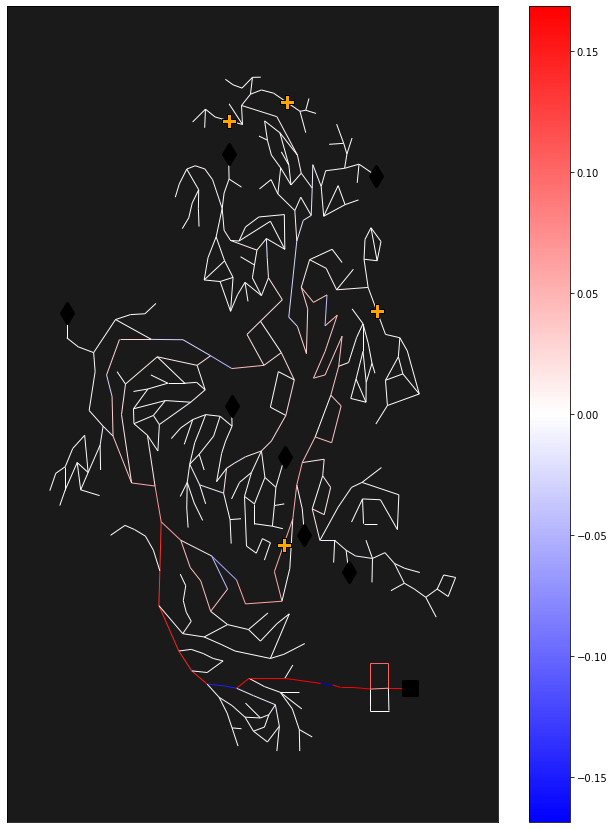

In [16]:
fig, ax = plt.subplots(figsize=(11,15))

#Plots continuous mean flowrate, with min_width and max_width (of links) being set equal to each other.
#Uses a blue-red colorbar to highlight differences between positive and negative values
#Uses gray background to better see plot.
#Includes pump mean flowrates
ax.set_facecolor((0.1, 0.1, 0.1))
wdn.plot_continuous_links(model, ax, parameter='flowrate', value='mean', 
                          cmap='bwr', 
                          pumps=False, 
                          min_width=1,max_width=1)

## 5.2 Create a plot for CONTINUOUS LINKS: MEAN FLOWRATE with differing link widths

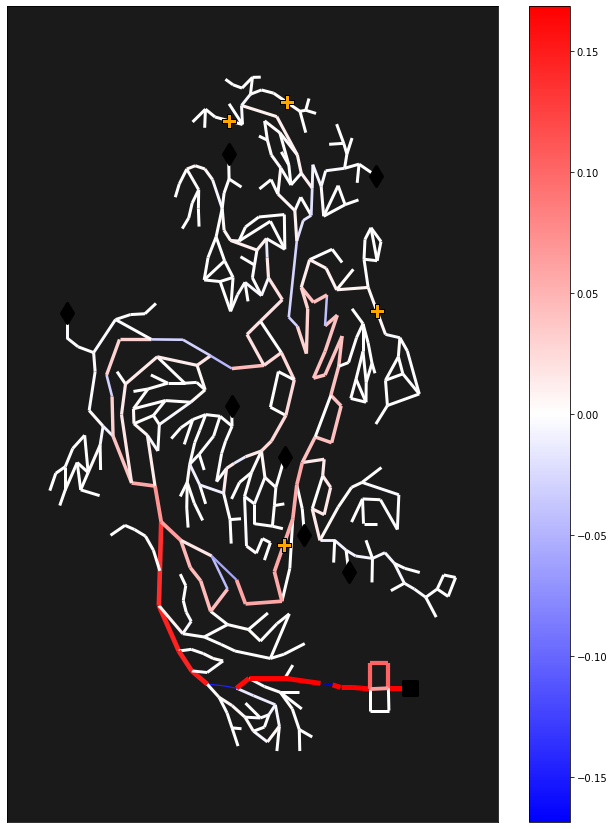

In [17]:
fig, ax = plt.subplots(figsize=(11,15))

#Plots continuous mean flowrate, with min_width and max_width being set to different values. 
#Uses gray background to better see plot.
ax.set_facecolor((0.1, 0.1, 0.1))
wdn.plot_continuous_links(model,ax,parameter='flowrate',value='mean', cmap='bwr', pumps=False, 
                          min_width=1,max_width=5)

# <span style="color:red"> 6. UNIQUE DATA plots </span> display node/link data that can falls within unique categories (for example: demand pattern, diameter).

## 6.1 Create a plot for UNIQUE LINK DATA: PIPE DIAMETERS

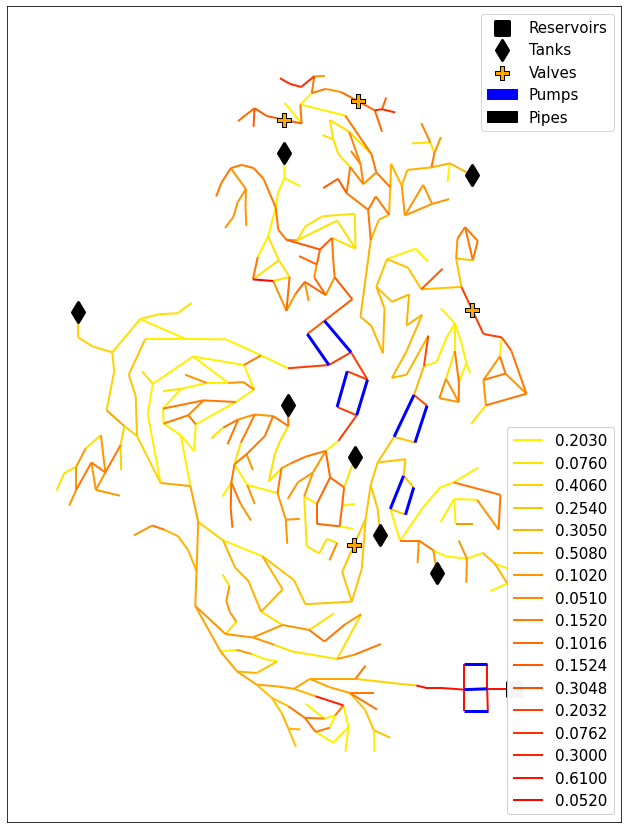

In [18]:
fig, ax = plt.subplots(figsize=(11,15))

#Plots unique pipe diameters
wdn.plot_unique_data(model,ax,parameter='diameter')

## 6.2 Create a plot for UNIQUE NODE DATA: NODE DEMAND PATTERNS

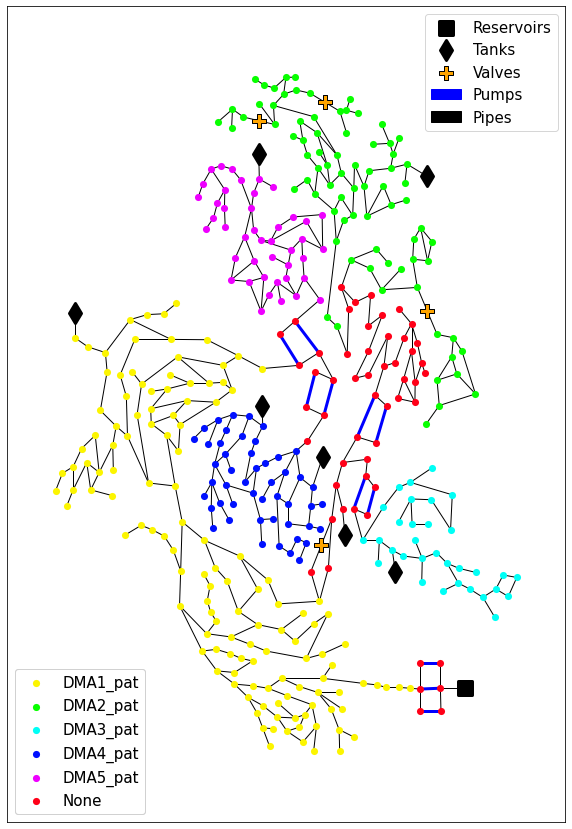

In [19]:
fig, ax = plt.subplots(figsize=(10,15))

#Plots demand patterns
wdn.plot_unique_data(model, ax, parameter='demand_patterns', cmap = 'hsv', legend_loc_2 = 'lower left')

## 6.3 Create a plot for UNIQUE NODE DATA: TAGS

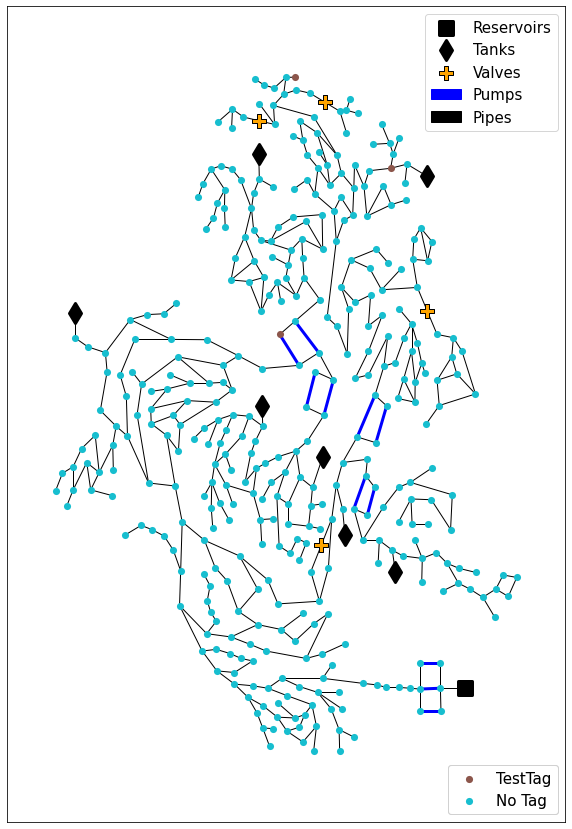

In [20]:
fig, ax = plt.subplots(figsize=(10,15))

#Plots node tags
wdn.plot_unique_data(model, ax, parameter='tag', cmap='tab10')

## 6.4 Create a plot for UNIQUE LINK DATA: PIPE MATERIAL DATA FROM EXCEL FILE

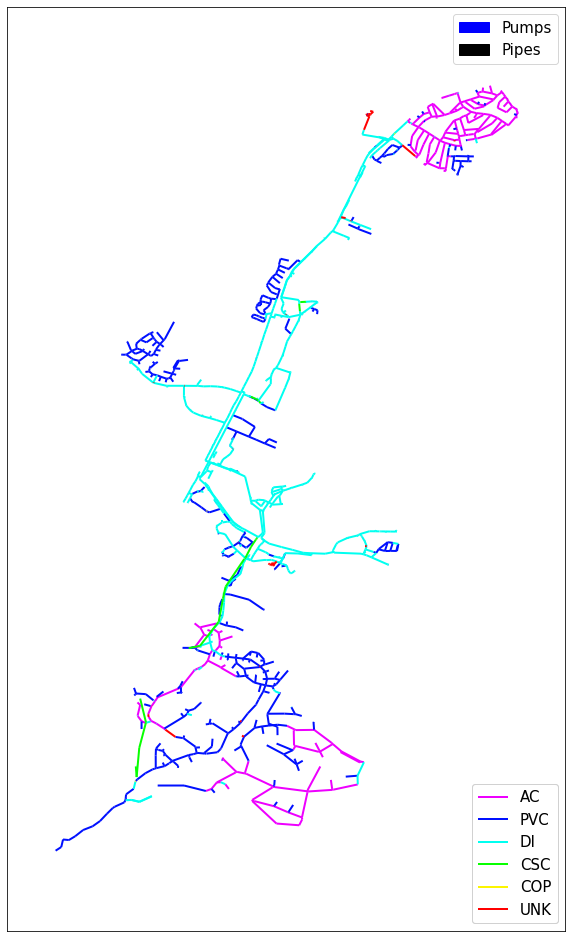

In [21]:
model = wdn.initialize_model(r'Networks\NWC_old_stations.inp')
fig, ax = plt.subplots(figsize=(10,17))

#Plots unique data from Excel file
wdn.plot_unique_data(model, ax, parameter='NWC Pipes.xlsx', # can specify Excel file to draw data from!
                     parameter_type='link',                 # choose if this data corresponds to node or link
                     data_type='unique',                    # data type can be discrete or continuous or unique
                     excel_columns=[0,1],                   # indices of relevant columns within Excel file 0: node names, 1: data
                     cmap = 'hsv_r',
                     reservoirs=False, tanks=False, valves=False)

## 6.5 Create a plot for LINK DATA: RANDOM PIPE DATA FROM EXCEL FILE

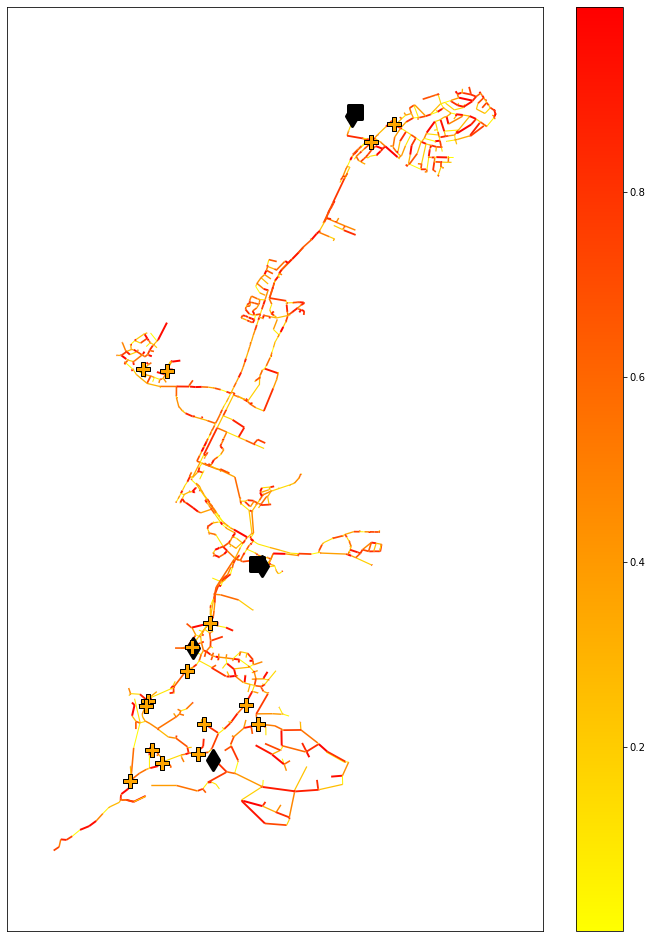

In [22]:
fig, ax = plt.subplots(figsize=(12,17))

#Extracts and plots continuous excel link data
wdn.plot_unique_data(model, ax, parameter='NWC Pipes.xlsx',
                     parameter_type='link',
                     data_type='continuous',
                     excel_columns=[0,3],
                     cmap='autumn_r',
                     max_width=2)

## 6.6 Create a plot for LINK DATA: RANDOM DATA FROM EXCEL FILE

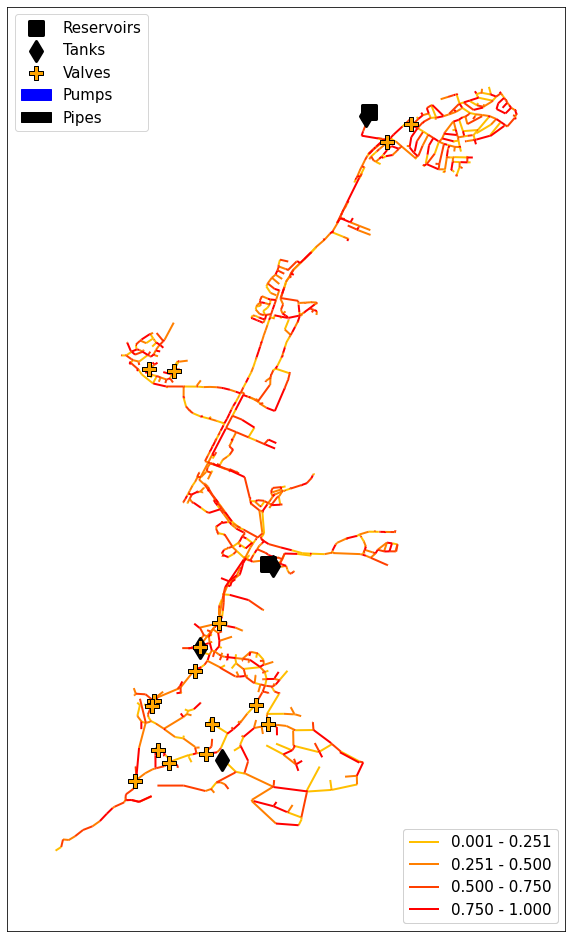

In [23]:
fig, ax = plt.subplots(figsize=(10,17))

#Plots discretized excel data
wdn.plot_unique_data(model, ax, parameter='NWC Pipes.xlsx',
                     parameter_type='link',
                     data_type='discrete',
                     bin_edge_num=5,
                     excel_columns=[0,3],
                     cmap='autumn_r',
                     max_width=2,
                    legend_loc_1 = 'upper left')

## 6.7 Create a plot for CUSTOM NODE DATA: RANDOM CONTINUOUS DATA FROM LIST

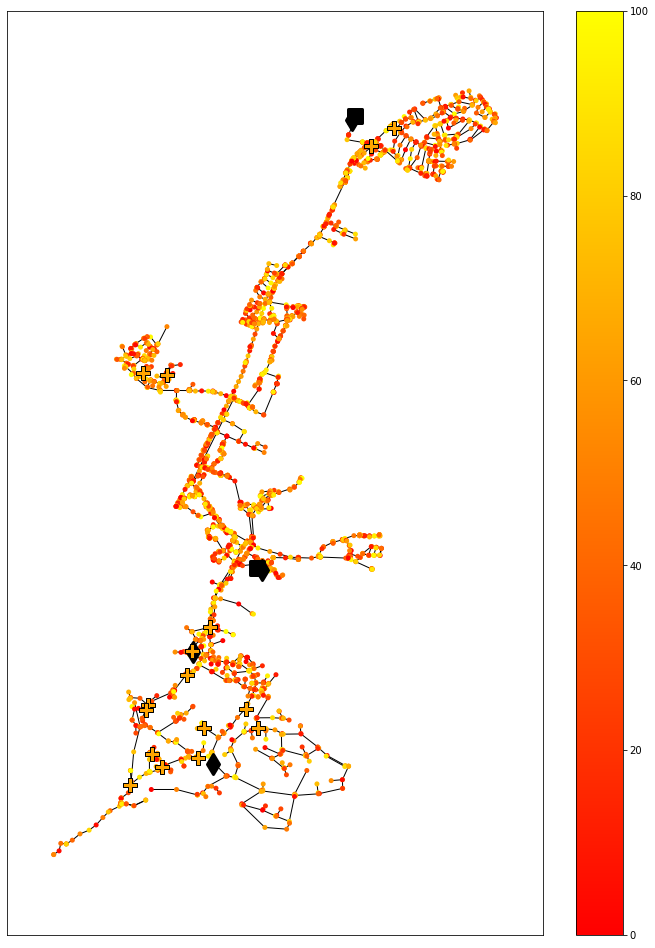

In [24]:
#Special continuous numerical data in python
import random
fig, ax = plt.subplots(figsize=(12,17))
data = []
index = []

for node in model['node_names']:
    data.append(random.randint(0,100))
    index.append(node)
    
wdn.plot_unique_data(model, ax, parameter='custom_data',
                     data_type='continuous',
                     parameter_type='node',
                     customDataValues=[index,data], # index is list of node names, data is list of data values
                     cmap='autumn')

## 6.8 Create a plot for CUSTOM NODE DATA: RANDOM DISCRETIZED DATA FROM LIST

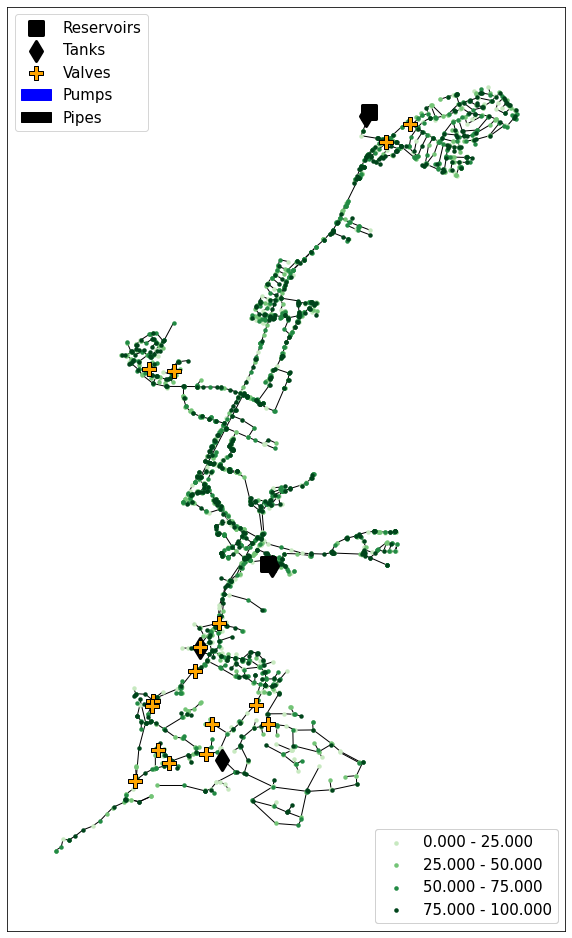

In [25]:
#Special discrete numerical data in python
fig, ax = plt.subplots(figsize=(10,17))
data = []
index = []

for node in model['node_names']:
    data.append(random.randint(0,100))
    index.append(node)
    
wdn.plot_unique_data(model,ax,parameter='custom_data',
                     data_type='discrete',
                     bin_edge_num=5,
                     parameter_type='node',
                     customDataValues=[index,data],
                     cmap='Greens',
                     legend_loc_1 = 'upper left')

# <span style="color:red"> 7. EXPLORING THE CAPABILITIES OF THE CODE </span> 

## 7.1 Plot DISCRETE NODES and add LABELS

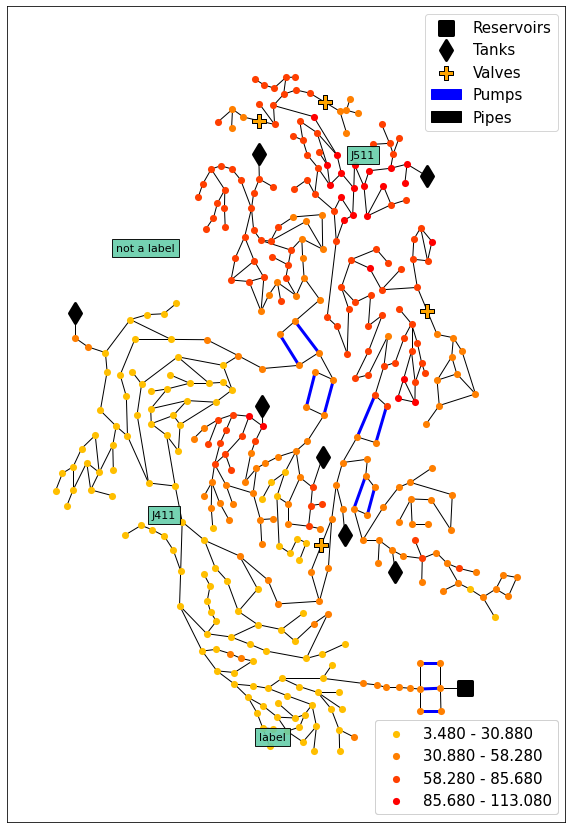

In [26]:
model = wdn.initialize_model('Networks\CTown.inp')

#Special Labels
fig, ax = plt.subplots(figsize=(10,15))

#Draws distinct elevation.
wdn.plot_discrete_nodes(model,ax,5,parameter='elevation')

#Draws label without providing list of nodes. 
#This means that the coordinates provided (the first set being x and the second being y coordinates) are absolute from 0 to 1. 
wdn.draw_label(model, ax, 
               labels = ['label','not a label'],
               x_coords = [0.5,0.3],
               y_coords = [0.1,0.7])

#Draws label by providing list of nodes. 
#This means that coordiantes are relative, and the value you will need to input will depend on the network.
wdn.draw_label(model, ax,
               labels = ['J511','J411'],
               x_coords = [50,-50],
               y_coords = [75,20],
               nodes = ['J511','J411'])

## 7.2 Plot DISCRETE NODES and HIGHLIGHT special nodes

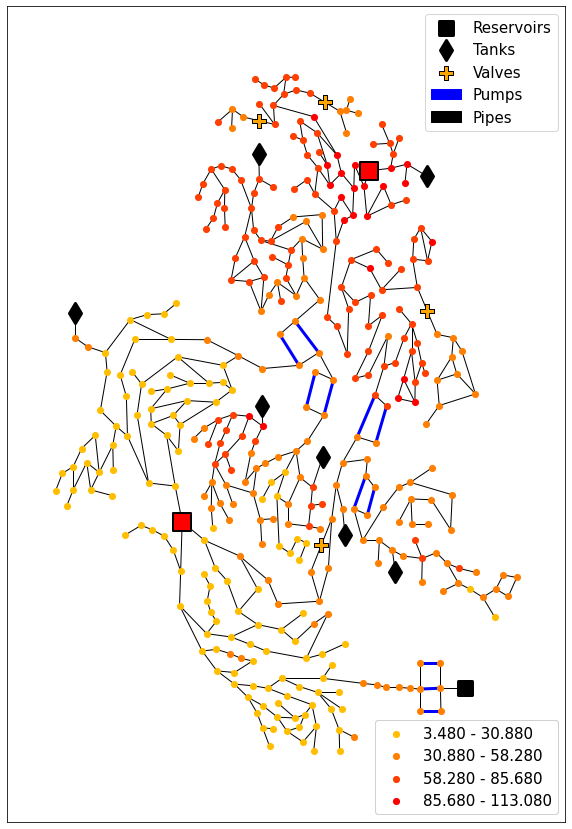

In [27]:
#Special Labels
fig, ax = plt.subplots(figsize=(10,15))

#Draws distinct elevation.
wdn.plot_discrete_nodes(model,ax,5,parameter='elevation')

#Plots red square with black outline at specific nodes
wdn.draw_nodes(model,['J511','J411'],
               node_size=300,
               node_color='r',
               node_shape='s',
               edge_colors='k',
               line_widths=2)

## 7.3 Plot both DISCRETE NODES and CONTINUOUS LINKS

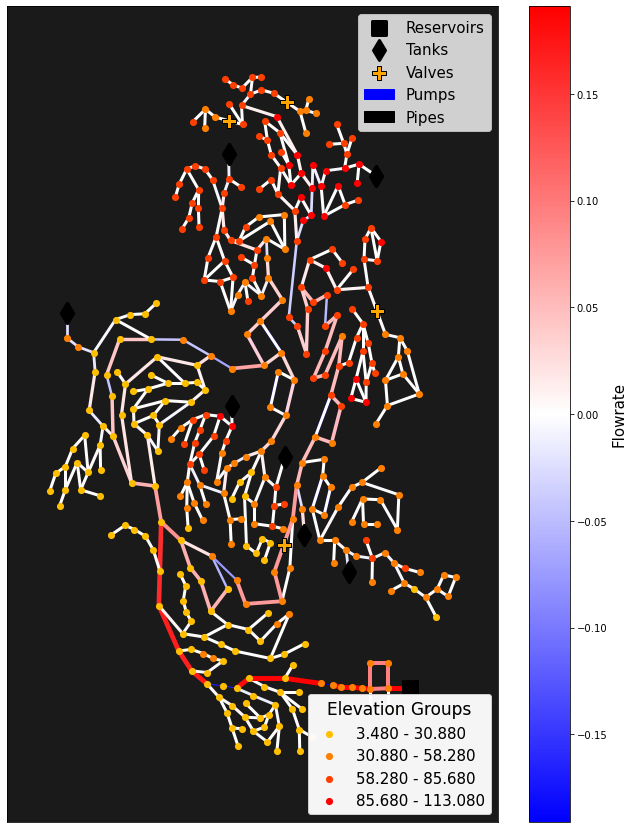

In [28]:
#Combination of distinct nodes + continuous links
fig, ax = plt.subplots(figsize=(11,15))
ax.set_facecolor((0.1, 0.1, 0.1))

wdn.plot_discrete_nodes(model,ax,5,parameter='elevation',
                        savefig=True, 
                        legend_title= 'Elevation Groups', 
                        save_name = 'ElevationMap')

wdn.plot_continuous_links(model,ax,parameter='flowrate',value=11,
                          pumps=False,
                          cmap='bwr',
                          color_bar_title="Flowrate", 
                          save_name="ContinuousFlowrate")

## 7.4 Plot DISCRETE NODES and CONTINUOUS LINKS as SUBPLOTS

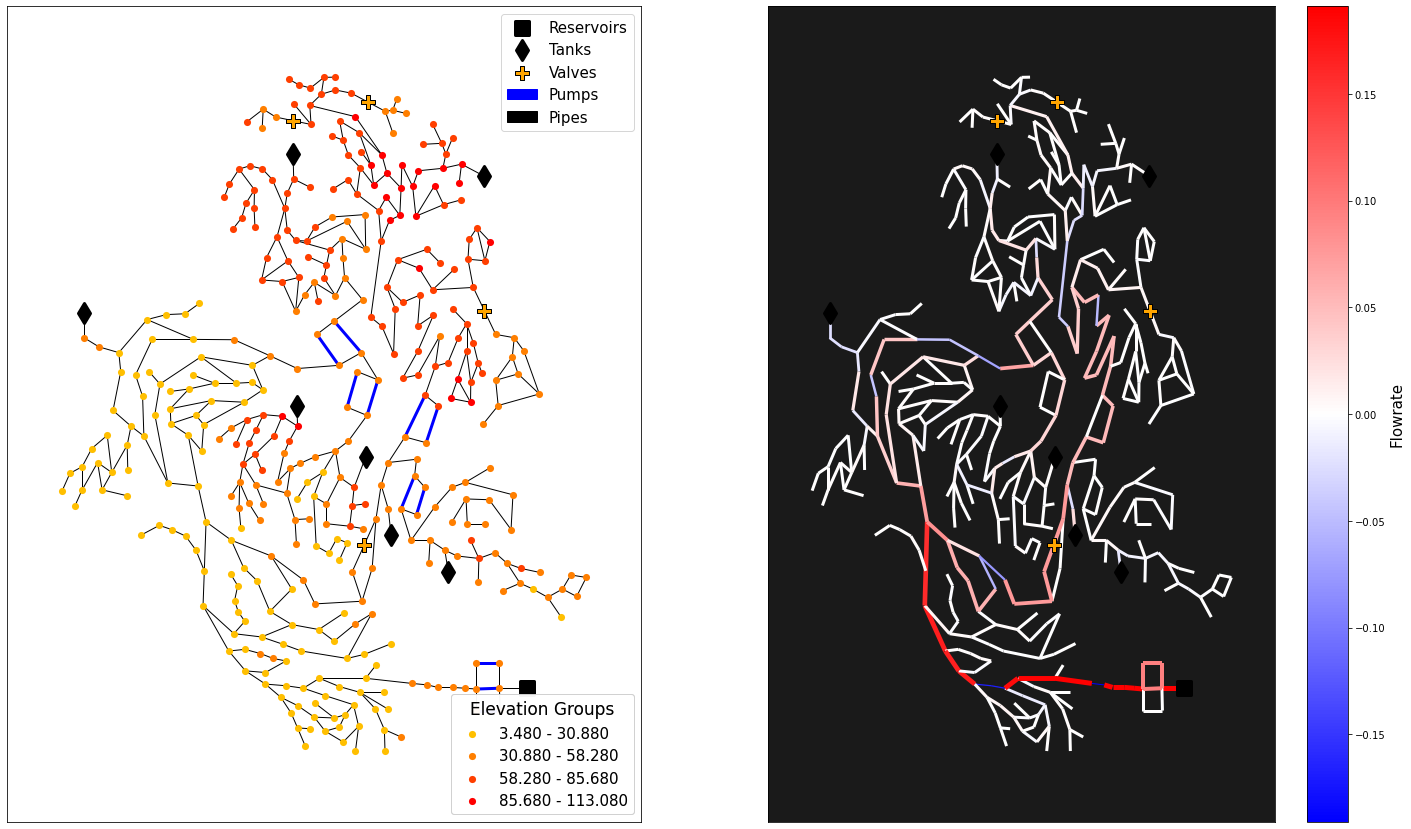

In [29]:
#Subplotting
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2,figsize=(25,15),sharex=True,sharey=True)
ax2.set_facecolor((0.1, 0.1, 0.1))

# plot 1
wdn.plot_discrete_nodes(model,ax1,5,parameter='elevation',
                        savefig=True, 
                        legend_title= 'Elevation Groups', 
                        save_name = 'ElevationMap')

# plot2
wdn.plot_continuous_links(model,ax2,parameter='flowrate',value=11,
                          pumps=False,
                          cmap='bwr',
                          color_bar_title="Flowrate", 
                          save_name="ContinuousFlowrate")

## 7.5 Create gif of DISCRETE NODE PRESSURE -- check folder to view gif

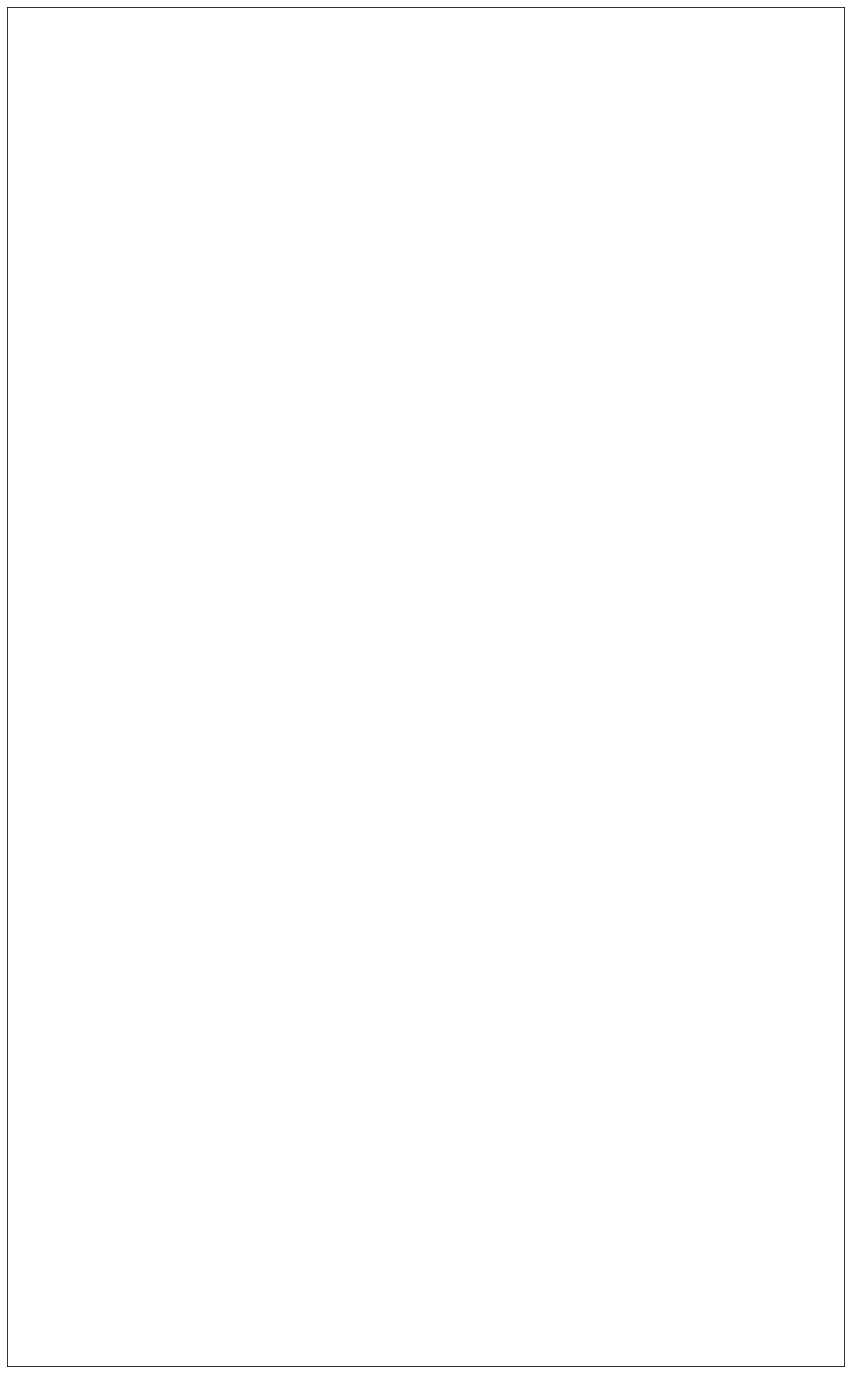

In [30]:
#Animates pressure at all timesteps
fig, ax = plt.subplots(figsize=(15,25))
wdn.animate_plot(model,ax,wdn.plot_discrete_nodes,
                 first_timestep=0,last_timestep=30,
                 bin_edge_num=5,
                 bins=[-0.0001,20,40,60,80],
                 parameter='pressure')